In [1]:
using Distributions
using StatsPlots
default(fmt=:png, size=(400, 250),
    titlefontsize=8, tickfontsize=6, legendfontsize=7, guidefontsize=7)
r(x) = round(x; digits=3)

r (generic function with 1 method)

$$
\begin{matrix}
Z          & & \\
\downarrow & \searrow & \\
X          & \to      & Y \\
\uparrow   & \nearrow & \\
U          & & \\
\end{matrix}
\qquad
\begin{cases}
X = bZ + pU + \varepsilon_1 \\
Y = aX + cZ + qU + \varepsilon_2 \\
\end{cases}
\qquad
E[X^2] = b^2+p^2+\sigma_1^2 = 1
$$

<img src="Section 4 of arxiv 1203.3503.jpg" width=80%>

In [2]:
function rand_XYZU(; σ₁=0.2, σ₂=0.2, a=1.0, b=0.9, c=1.0, p=√(1-b^2-σ₁^2), q=1.0)
    Z = randn()
    U = randn()
    X = b*Z + p*U + σ₁*randn()
    Y = a*X + c*Z + q*U + σ₂*randn()
    [X, Y, Z, U]
end

function rand_XYZU(n; σ₁=0.2, σ₂=0.2, a=1.0, b=0.9, c=0.5, p=√(1-b^2-σ₁^2), q=0.5)
    [rand_XYZU(; σ₁, σ₂, a, b, c, p, q) for _ in 1:n] |> stack
end

rand_XYZU(100) .|> r

4×100 Matrix{Float64}:
 0.141  -0.908  -2.238  -0.097  0.933  …  -0.478   1.388   0.576   0.164
 0.894  -1.67   -3.7    -0.84   1.585     -1.174   1.845   1.774   0.098
 0.115  -1.383  -1.152   0.516  0.128      0.403   2.306  -0.245  -0.013
 0.513   0.159  -1.789  -1.003  1.243     -1.286  -1.468   2.246   0.082

In [3]:
function show_XYZU(; σ₁=0.2, σ₂=0.2, a=1.0, b=0.9, c=0.5, p=√(1-b^2-σ₁^2), q=0.5, n=10^6)
    @show r(σ₁) r(σ₂) r(a) r(b) r(c) r(p) r(q) n
    println()

    data = rand_XYZU(n; σ₁, σ₂, a, b, c, p, q)
    X, Y, Z, U = eachrow(data)
    @show mean.((X, Y, Z, U)) .|> r
    @show var.((X, Y, Z, U)) .|> r
    @show std.((X, Y, Z, U)) .|> r
    println()

    # Y ∼ α₁X
    @show a + b*c + p*q |> r
    α = [X;;] \ Y
    @show r.(α)
    println()
    # Y ∼ β₁X + β₂Z
    @show r(a + p*q/(1 - b^2)) r(c - b*p*q/(1 - b^2))
    β = [X Z] \ Y
    @show r.(β)
    println()
    # Y ∼ γ₁X + γ₂Z + γ₃U
    @show a, c, q
    γ = [X Z U] \ Y
    @show r.(γ)
    println()

    err_α = @. Y - α[1]*X
    err_β = @. Y - (β[1]*X + β[2]*Z)
    err_γ = @. Y - (γ[1]*X + γ[2]*Z + γ[3]*U)
    @show mean.((err_α, err_β, err_γ)) .|> r
    @show var.((err_α, err_β, err_γ)) .|> r
    @show std.((err_α, err_β, err_γ)) .|> r
    println()

    plot()
    stephist!(err_α; norm=true, label="Y ∼ X", ls=:solid)
    stephist!(err_β; norm=true, label="Y ∼ X + Z", ls=:dash)
    stephist!(err_γ; norm=true, label="Y ∼ X + Z + U", ls=:dashdot)
    plot!(xguide="error")
end

show_XYZU (generic function with 1 method)

r(σ₁) = 0.2
r(σ₂) = 0.2
r(a) = 1.0
r(b) = 0.9
r(c) = 0.5
r(p) = 0.387
r(q) = 0.5
n = 1000000

mean.((X, Y, Z, U)) .|> r = (-0.0, -0.0, -0.0, 0.0)
var.((X, Y, Z, U)) .|> r = (1.001, 2.828, 1.001, 0.999)
std.((X, Y, Z, U)) .|> r = (1.0, 1.682, 1.001, 1.0)

a + b * c + p * q |> r = 1.644
r.(α) = [1.643]

r(a + (p * q) / (1 - b ^ 2)) = 2.019
r(c - (b * p * q) / (1 - b ^ 2)) = -0.417
r.(β) = [2.019, -0.417]

(a, c, q) = (1.0, 0.5, 0.5)
r.(γ) = [0.999, 0.501, 0.5]

mean.((err_α, err_β, err_γ)) .|> r = (0.0, -0.0, -0.0)
var.((err_α, err_β, err_γ)) .|> r = (0.126, 0.093, 0.04)
std.((err_α, err_β, err_γ)) .|> r = (0.355, 0.304, 0.2)



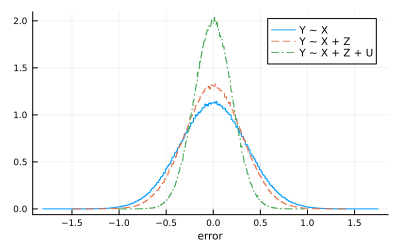

In [4]:
σ₁=0.2
σ₂=0.2
a=1.0
b=0.9
c=0.5
p=√(1-b^2-σ₁^2)
q=0.5
n = 10^6
show_XYZU(; σ₁, σ₂, a, b, c, p, q, n)

r(σ₁) = 0.2
r(σ₂) = 0.2
r(a) = 1.0
r(b) = 0.693
r(c) = 0.5
r(p) = 0.693
r(q) = 0.5
n = 1000000

mean.((X, Y, Z, U)) .|> r = (-0.002, -0.004, -0.002, -0.001)
var.((X, Y, Z, U)) .|> r = (0.998, 2.92, 0.997, 1.0)
std.((X, Y, Z, U)) .|> r = (0.999, 1.709, 0.999, 1.0)

a + b * c + p * q |> r = 1.693
r.(α) = [1.692]

r(a + (p * q) / (1 - b ^ 2)) = 1.666
r(c - (b * p * q) / (1 - b ^ 2)) = 0.038
r.(β) = [1.665, 0.039]

(a, c, q) = (1.0, 0.5, 0.5)
r.(γ) = [0.999, 0.501, 0.5]

mean.((err_α, err_β, err_γ)) .|> r = (-0.0, -0.0, -0.0)
var.((err_α, err_β, err_γ)) .|> r = (0.06, 0.059, 0.04)
std.((err_α, err_β, err_γ)) .|> r = (0.245, 0.244, 0.2)



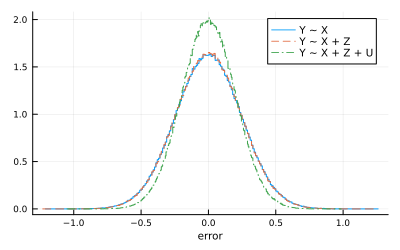

In [5]:
σ₁=0.2
σ₂=0.2
a=1.0
b=√((1 - σ₁^2)/2)
c=0.5
p=√(1-b^2-σ₁^2)
q=0.5
n = 10^6
show_XYZU(; σ₁, σ₂, a, b, c, p, q, n)

r(σ₁) = 0.2
r(σ₂) = 0.2
r(a) = 1.0
r(b) = 0.1
r(c) = 0.5
r(p) = 0.975
r(q) = 0.5
n = 1000000

mean.((X, Y, Z, U)) .|> r = (-0.002, -0.003, -0.001, -0.002)
var.((X, Y, Z, U)) .|> r = (1.001, 2.619, 1.003, 1.001)
std.((X, Y, Z, U)) .|> r = (1.0, 1.618, 1.001, 1.0)

a + b * c + p * q |> r = 1.537
r.(α) = [1.538]

r(a + (p * q) / (1 - b ^ 2)) = 1.492
r(c - (b * p * q) / (1 - b ^ 2)) = 0.451
r.(β) = [1.492, 0.451]

(a, c, q) = (1.0, 0.5, 0.5)
r.(γ) = [1.0, 0.5, 0.5]

mean.((err_α, err_β, err_γ)) .|> r = (-0.0, 0.0, 0.0)
var.((err_α, err_β, err_γ)) .|> r = (0.252, 0.05, 0.04)
std.((err_α, err_β, err_γ)) .|> r = (0.502, 0.224, 0.2)



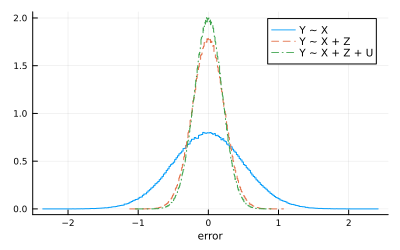

In [6]:
σ₁=0.2
σ₂=0.2
a=1.0
b=0.1
c=0.5
p=√(1-b^2-σ₁^2)
q=0.5
n = 10^6
show_XYZU(; σ₁, σ₂, a, b, c, p, q, n)

r(σ₁) = 0.4
r(σ₂) = 2.0
r(a) = 1.0
r(b) = 0.1
r(c) = 10.0
r(p) = 0.911
r(q) = 1.098
n = 1000000

mean.((X, Y, Z, U)) .|> r = (0.001, -0.013, -0.002, 0.001)
var.((X, Y, Z, U)) .|> r = (1.0, 110.178, 1.0, 1.0)
std.((X, Y, Z, U)) .|> r = (1.0, 10.497, 1.0, 1.0)

a + b * c + p * q |> r = 3.0
r.(α) = [3.01]

r(a + (p * q) / (1 - b ^ 2)) = 2.01
r(c - (b * p * q) / (1 - b ^ 2)) = 9.899
r.(β) = [2.01, 9.896]

(a, c, q) = (1.0, 10.0, 1.0976425998969035)
r.(γ) = [1.005, 9.997, 1.092]

mean.((err_α, err_β, err_γ)) .|> r = (-0.016, 0.003, 0.003)
var.((err_α, err_β, err_γ)) .|> r = (101.122, 4.19, 3.997)
std.((err_α, err_β, err_γ)) .|> r = (10.056, 2.047, 1.999)



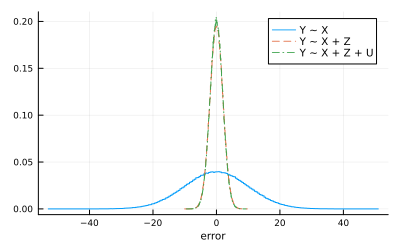

In [7]:
σ₁=0.4
σ₂=2.0
a=1.0
b=0.1
c=1/b
p=√(1-b^2-σ₁^2)
q=1/p
n = 10^6
show_XYZU(; σ₁, σ₂, a, b, c, p, q, n)